<a href="https://colab.research.google.com/github/piyush033/Neural_Network/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [39]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
len(X_train)

60000

In [41]:
len(X_test)

10000

In [42]:
X_train[0].shape

(28, 28)

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

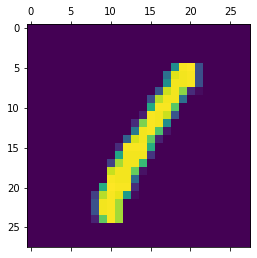

In [44]:
plt.matshow(X_train[3])

In [45]:
y_train[3]

1

In [46]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [47]:
X_train = X_train/255
X_test = X_test/255

In [48]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [49]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X_train_flattened.shape

(60000, 784)

In [51]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
    ])

model.compile(
              optimizer = 'adam', 
              loss ='sparse_categorical_crossentropy', 
              metrics=['accuracy']
              )

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4717 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2663 - accuracy: 0.9254


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2678 - accuracy: 0.9250


[0.26778551936149597, 0.925000011920929]

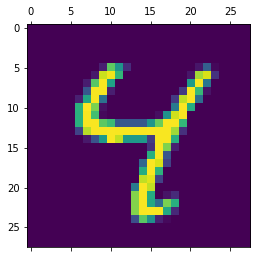

In [54]:
plt.matshow(X_test[6])

In [55]:
y_predict = model.predict(X_test_flattened)
y_predict[6]

313/313 [==============================] - 1s 4ms/step


array([4.1910302e-04, 4.8995331e-05, 1.2743918e-04, 3.1367838e-02,
       9.9726593e-01, 4.8568052e-01, 1.0582411e-02, 1.6367978e-01,
       7.4298733e-01, 5.7753319e-01], dtype=float32)

In [56]:
np.argmax(y_predict[6])

4

In [58]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [61]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   5,    9,  925,   16,    8,    6,   11,   11,   38,    3],
       [   3,    0,   20,  915,    1,   29,    2,   10,   23,    7],
       [   1,    1,    4,    1,  926,    0,    9,    5,   11,   24],
       [   7,    3,    3,   28,   11,  794,   11,    5,   26,    4],
       [  10,    3,    6,    1,    8,   25,  901,    2,    2,    0],
       [   1,    6,   21,    8,    9,    0,    0,  961,    2,   20],
       [   7,   11,    6,   22,    9,   37,    9,   14,  854,    5],
       [  11,    7,    1,   11,   38,   11,    0,   32,    8,  890]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

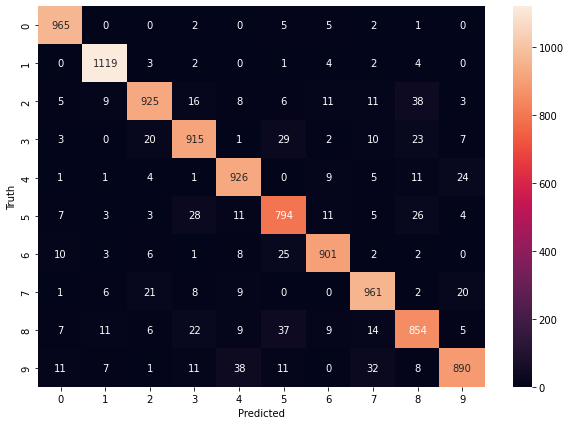

In [62]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')